## 2주차 실습- knn으로 붓꽃 데이터 분류하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f"{model_name} Confusion Maxtrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [4]:
file_path = 'C://Users//Chick//AI-Tues//1week//iris.csv'  # 본인이 iris.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(file_path)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.drop(columns=['Name'])
y = df['Name']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 특징 스케일링이 중요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# KNN 모델 훈련 (k=3으로 설정)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 모델 훈련
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

예측 값: ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
실제 값: 73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131  

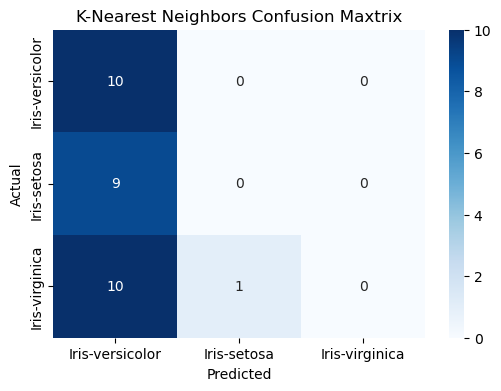

In [10]:
# 예측한 값과 정답 비교
### X_train이 DataFrame이라면, X_train의 열 이름을 X_test_scaled에 적용
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
y_pred = knn.predict(X_test_scaled_df)


# 예측값과 실제값 비교
print("예측 값:", y_pred)
print("실제 값:", y_test)

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy * 100:.2f}%")

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("혼동 행렬:")
print(cm)

plot_confusion_matrix(y_test, y_pred, "K-Nearest Neighbors") # Confusion Maxtrix를 시각화하여 예측 정확도 확인